Напишите на Python реализацию как минимум одного алгоритма на выбор:  
любая на выбор цветовая обработка,   
перевод в другое цветовое пространство или фильтрация.  
Изображение выберите самостоятельно.  

In [15]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

import imageio

from skimage.color import rgb2hsv, hsv2rgb

Загружаю картинку кртика rgb

In [2]:
img = imageio.imread('cat-color.png')
img = img.astype(np.float32) / 255.
print(img.shape)

(667, 730, 3)


c:\program files\python37\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning dissapear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  """Entry point for launching an IPython kernel.


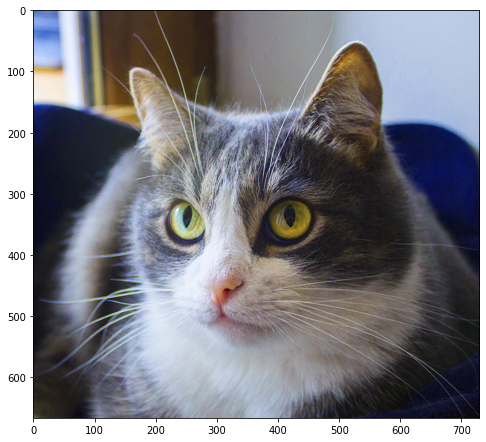

In [3]:
plt.figure(figsize=(8, 8))
plt.imshow(img)

привожу к чб цвету путем зануления значений rgb

In [5]:
img_grey = np.copy(img[:,:,0])

In [7]:
img_grey.shape

(667, 730)

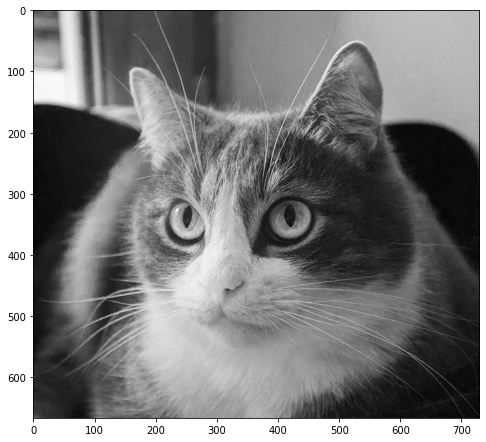

In [6]:
plt.figure(figsize=(8, 8))
plt.imshow(img_grey,cmap='gray')

привожу к двумерному пространству путем засреднения 3го пространства

In [9]:
img_grey_2 = np.copy(np.mean(img, axis=2))

In [10]:
img_grey_2.shape

(667, 730)

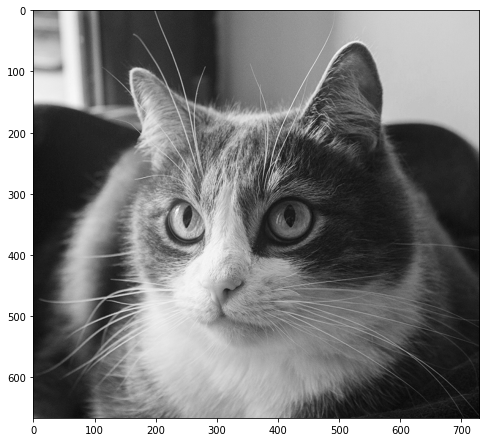

In [11]:
plt.figure(figsize=(8, 8))
plt.imshow(img_grey_2,cmap='gray')

Затемнение изображения путем возведения в квадрат значений, таким образом белый останется белым, а черный черным

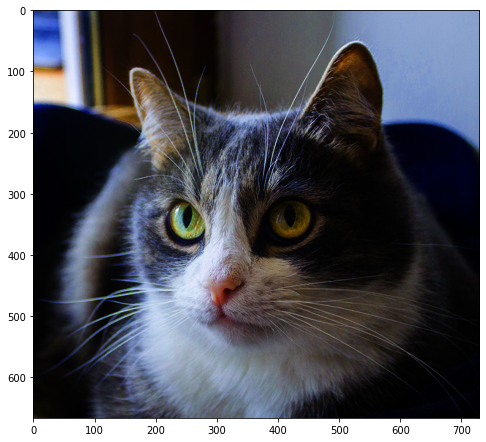

In [12]:
plt.figure(figsize=(8, 8))
plt.imshow(img**2)

Засветление изображения путем извлечения квадратного корня значений, таким образом белый останется белым, а черный черным

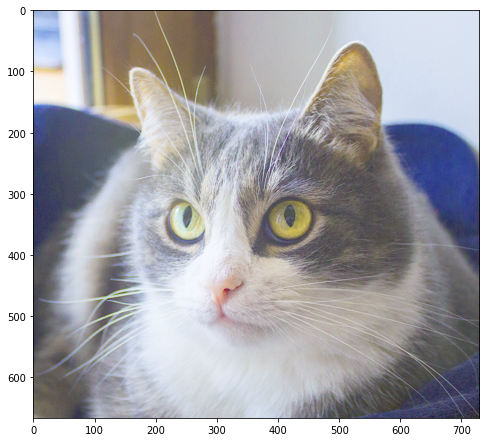

In [13]:
plt.figure(figsize=(8, 8))
plt.imshow(img**0.5)

# перевод в другое цветовое пространство

в пространство hsv

In [16]:
img_hsv = rgb2hsv(img)

In [17]:
img_hsv[:5, :5, :]

array([[[0.61702126, 0.5136612 , 0.7176471 ],
        [0.6180555 , 0.51891893, 0.7254902 ],
        [0.6088435 , 0.5297297 , 0.7254902 ],
        [0.6088435 , 0.5240642 , 0.73333335],
        [0.61702126, 0.5136612 , 0.7176471 ]],

       [[0.6185567 , 0.53296703, 0.7137255 ],
        [0.6180555 , 0.5217391 , 0.72156864],
        [0.6180555 , 0.5217391 , 0.72156864],
        [0.6175439 , 0.5277778 , 0.7058824 ],
        [0.6175439 , 0.5248619 , 0.70980394]],

       [[0.6185567 , 0.5388889 , 0.7058824 ],
        [0.6180555 , 0.5217391 , 0.72156864],
        [0.6180555 , 0.51336896, 0.73333335],
        [0.6175439 , 0.5277778 , 0.7058824 ],
        [0.6088435 , 0.5355191 , 0.7176471 ]],

       [[0.6111111 , 0.5238095 , 0.7411765 ],
        [0.6116667 , 0.52910054, 0.7411765 ],
        [0.605     , 0.53763443, 0.7294118 ],
        [0.605     , 0.53763443, 0.7294118 ],
        [0.6088435 , 0.5212766 , 0.7372549 ]],

       [[0.6094771 , 0.5396825 , 0.7411765 ],
        [0.60891086, 0.534

нелинейное уменьшение насыщенности, плюсы нелинейного преобразования, значения rgb не выходят за максимальный и минимальный порог

In [18]:
img_hsv_new = np.copy(img_hsv)
img_hsv_new[:, :, 1] **= 2
img_new = hsv2rgb(img_hsv_new)

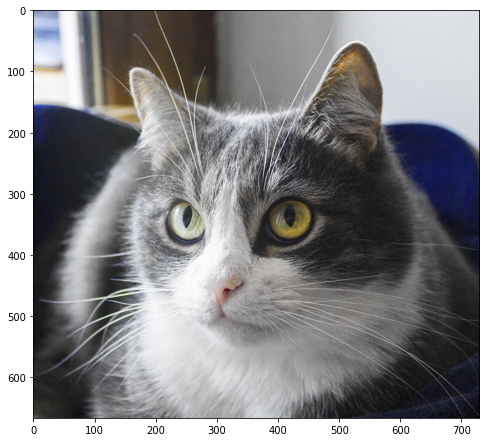

In [19]:
plt.figure(figsize=(8, 8))
plt.imshow(img_new)

нелинейное увеличение насыщенности, плюсы нелинейного преобразования, значения rgb не выходят за максимальный и минимальный порог

In [20]:
img_hsv_new = np.copy(img_hsv)
img_hsv_new[:, :, 1] **= 0.5
img_new = hsv2rgb(img_hsv_new)

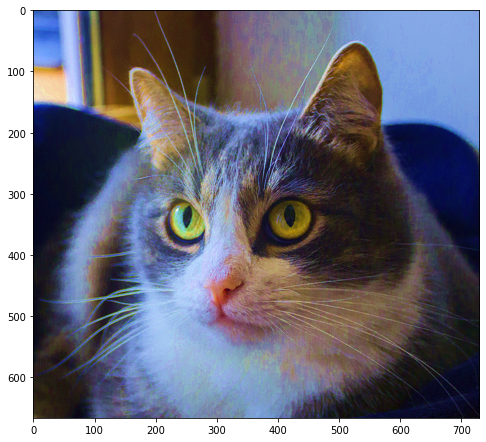

In [21]:
plt.figure(figsize=(8, 8))
plt.imshow(img_new)

Изменение тона

In [32]:
img_hsv_new = np.copy(img_hsv)
img_hsv_new[:, :, 0] **= 0.05
img_new = hsv2rgb(img_hsv_new)

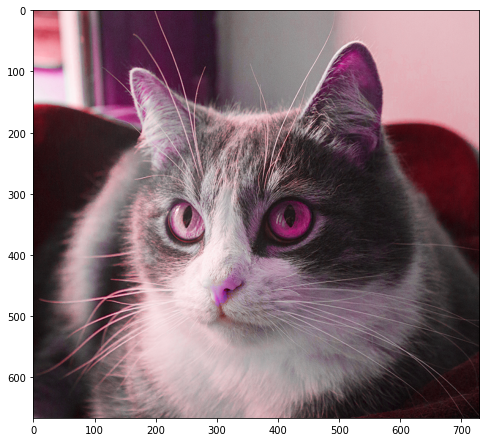

In [33]:
plt.figure(figsize=(8, 8))
plt.imshow(img_new)

# фильтрация

In [37]:
def my_filter(x):
    # Box blur
    return np.mean(x)

In [36]:
img.shape

(667, 730, 3)

In [48]:
%%time
win_size = (10,10)

out_img = np.zeros(
        (img_grey_2.shape[0] - win_size[0] + 1,
        img_grey_2.shape[1] - win_size[1] + 1),
    dtype=np.float32
)
for i in range(out_img.shape[0]):
    for j in range(out_img.shape[1]):
        x = img_grey_2[i:i+win_size[0], j:j+win_size[1]]
        out_img[i,j] = my_filter(x)


Wall time: 8.34 s


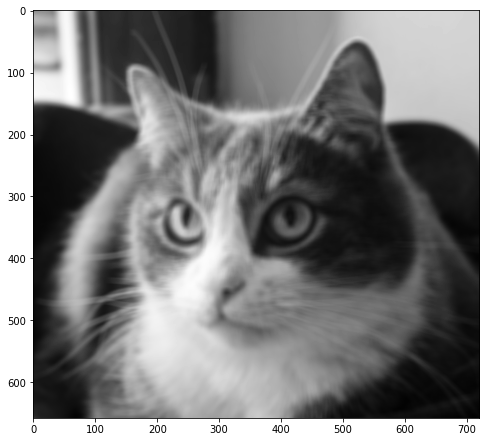

In [49]:
plt.figure(figsize=(8, 8))
plt.imshow(out_img, cmap='gray')

In [50]:
%%time
win_size = (30,30)

out_img_2 = np.zeros(
        (img_grey_2.shape[0] - win_size[0] + 1,
        img_grey_2.shape[1] - win_size[1] + 1),
    dtype=np.float32
)
for i in range(out_img_2.shape[0]):
    for j in range(out_img_2.shape[1]):
        x = img_grey_2[i:i+win_size[0], j:j+win_size[1]]
        out_img_2[i,j] = my_filter(x)


Wall time: 8.57 s


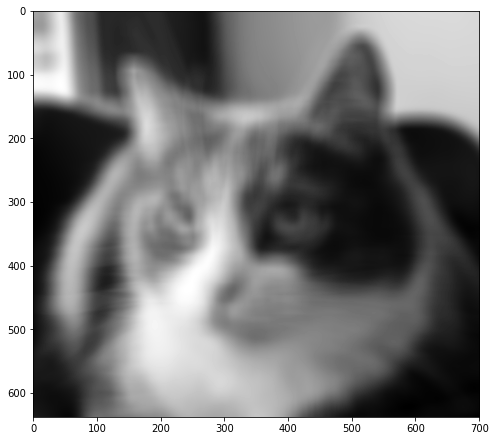

In [51]:
plt.figure(figsize=(8, 8))
plt.imshow(out_img_2, cmap='gray')

при box blur чем больше окно фильтрации тем сильнее замывает

In [86]:
import scipy.signal
from scipy import signal

In [101]:
template = np.copy(img_grey_2[280:380, 370:480])  # right eye
template -= template.mean()

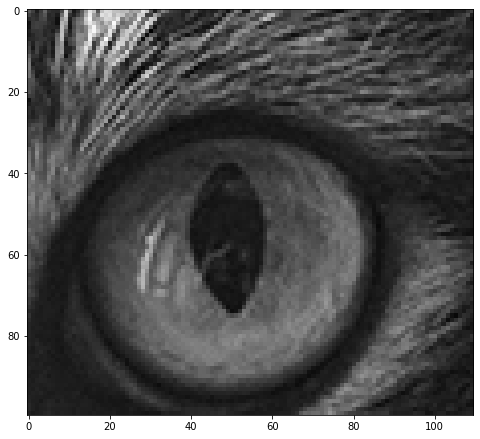

In [102]:
template
plt.figure(figsize=(8, 8))
plt.imshow(template, cmap='gray')

In [75]:
win_size = (15,15)
w = np.ones(win_size, dtype = np.float32)
w /= np.sum(w)

In [76]:
w

array([[0.00444444, 0.00444444, 0.00444444, 0.00444444, 0.00444444,
        0.00444444, 0.00444444, 0.00444444, 0.00444444, 0.00444444,
        0.00444444, 0.00444444, 0.00444444, 0.00444444, 0.00444444],
       [0.00444444, 0.00444444, 0.00444444, 0.00444444, 0.00444444,
        0.00444444, 0.00444444, 0.00444444, 0.00444444, 0.00444444,
        0.00444444, 0.00444444, 0.00444444, 0.00444444, 0.00444444],
       [0.00444444, 0.00444444, 0.00444444, 0.00444444, 0.00444444,
        0.00444444, 0.00444444, 0.00444444, 0.00444444, 0.00444444,
        0.00444444, 0.00444444, 0.00444444, 0.00444444, 0.00444444],
       [0.00444444, 0.00444444, 0.00444444, 0.00444444, 0.00444444,
        0.00444444, 0.00444444, 0.00444444, 0.00444444, 0.00444444,
        0.00444444, 0.00444444, 0.00444444, 0.00444444, 0.00444444],
       [0.00444444, 0.00444444, 0.00444444, 0.00444444, 0.00444444,
        0.00444444, 0.00444444, 0.00444444, 0.00444444, 0.00444444,
        0.00444444, 0.00444444, 0.00444444, 

в качестве фильтра еденичная матрица 15/15

In [77]:
corr1 = signal.correlate2d(img_grey_2, w, boundary='symm', mode='same')

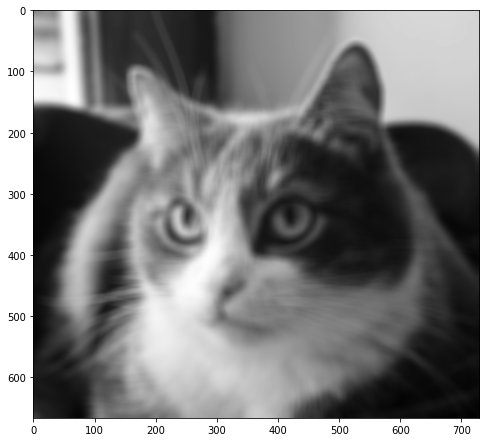

In [80]:
plt.figure(figsize=(8, 20))
# plt.imshow(corr1, cmap='gray')
plt.imshow(np.abs(corr1), cmap='gray')

в качестве фильтра взята часть картинки, глаз кошки

In [103]:
corr = signal.correlate2d(img_grey_2, template, boundary='symm', mode='same')

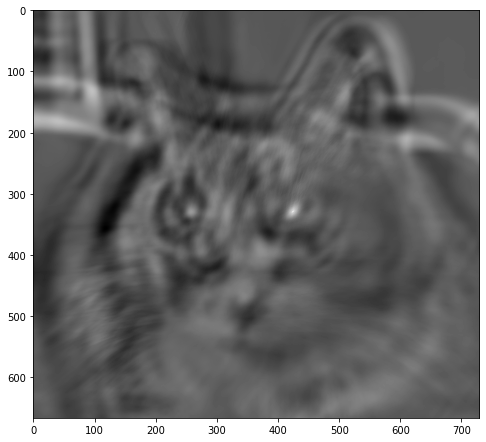

In [104]:
plt.figure(figsize=(8, 20))
plt.imshow(corr, cmap='gray')


Вывод: Лучше пользовать библиотеками, они быстрее и удоьны в использовании